# Data Science 1 '22/'23

## Numerical Analysis & Signal Analysis - Curve Fitting

The following material is partly covered in Chapter 3 - *Interpolation and Curve Fitting* of the book *Numerical methods in engineering with Python 3* by Jaan Kiusalaas.

<img src="https://m.media-amazon.com/images/I/51uvB6TEd5L.jpg" alt="Book cover" height="10%" width="10%" halign="center" />

### Introduction

In the previous lessons we [interpolated](https://en.wikipedia.org/wiki/Interpolation) a signal by means of either a single or a piecewise polynomial function that passed exactly through all the data points. Oftentimes, the measured signal is noisy, and therefore the best solution does not necessarily have to interpolate the data exactly. It may even be undesirable to do so, as the solution would overfit the data. Instead, a curve that closely approximates the data may be sufficient. This is achieved by applying [curve fitting](https://en.wikipedia.org/wiki/Curve_fitting). This approach is based on regression techniques.

Curve fitting consists of two steps: choosing the form of the function $f(x)$ that is to be fitted to the data points, followed by computation of the parameters that produce the best fit to the data. Generally, linear regression considers a fit of the linear form

$$
f(x) = a_0 \cdot f_0(x) + a_1 \cdot f_1(x) + \ldots + a_m \cdot f_m(x) = \sum_{j=0}^m a_j \cdot f_j(x)
$$

where each $f_j(x)$ is a predetermined function of $x$, called a [basis function](https://en.wikipedia.org/wiki/Basis_function).

Because, unlike interpolation, the data points $(x_i,y_i)$ are not exactly fitted, we denote the estimated $y$-values as $\hat{y}_i = f(x_i)$; the hat-notation is often used in statistics to indicate *estimated* values of measured variables. The differences $r_i = y_i-f(x_i) = y_i-\hat{y}_i$ are called [residuals](https://en.wikipedia.org/wiki/Errors_and_residuals); they represent the discrepancy between the data points and the fitting function at $x_i$.

This brings us to the question: What is meant by the "best" fit? If the noise is confined to the $y$-coordinate, the most commonly used measure is the [least-squares](https://en.wikipedia.org/wiki/Least_squares) fit, which minimizes the sum-of-squares of the residuals

$$
S(a_0, a_1, \ldots, a_m) = \sum_i r_i^2 = \sum_i \left( y_i-\hat{y}_i \right)^2
$$

with respect to each $a_j$. The function $S$ to be minimized is thus the sum of the squares of the residuals. Therefore, the optimal values of the parameters are given by the solution of the equations $\frac{\partial S}{\partial a_j} = 0$.

In matrix notation the equations involving the derivatives of the sum-of-squared-errors (SSE) function $S$ become $\boldsymbol{M}\boldsymbol{a} = \boldsymbol{b}$, where $M_{jk} = \sum_i f_j(x_i) \cdot f_k(x_i)$ and $b_{j} = \sum_i f_j(x_i) \cdot y_i$. The equations in the matrix equality are known as the *normal equations* of the least-squares fit. They can be solved using linear algebra methods (e.g. Gaussian elimination). Note that the coefficient matrix is symmetric (i.e., $M_{kj} = M_{jk}$).

### Polynomial regression

A commonly used linear form is a [polynomial](https://en.wikipedia.org/wiki/Polynomial_regression). If the degree of the polynomial is $m$, we have

$$
f(x) = \sum_{j=0}^m a_j \cdot x^j = a_0 + a_1 \cdot x + \ldots + a_m \cdot x^m
$$

Here, the basis functions are the powers of $x$, i.e. $f_j(x) = x^j$ (and in particular $f_0(x)=1$). The matrix equation then becomes

$$
\left[ \begin{array}{ccccc}
n & \sum_i x_i & \sum_i x_i^2 & \cdots & \sum_i x_i^m \\
\sum_i x_i & \sum_i x_i^2 & \sum_i x_i^3 & \cdots & \sum_i x_i^{m+1} \\
\sum_i x_i^2 & \sum_i x_i^3 & \sum_i x_i^4 & \cdots & \sum_i x_i^{m+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_i x_i^m & \sum_i x_i^{m+1} & \sum_i x_i^{m+2} & \cdots & \sum_i x_i^{2m}
\end{array} \right] \left[ \begin{array}{c}
a_0\\
a_1\\
a_2\\
\vdots\\
a_m
\end{array} \right] = \left[ \begin{array}{c}
\sum_i y_i\\
\sum_i x_i y_i\\
\sum_i x_i^2 y_i\\
\vdots\\
\sum_i x_i^m y_i
\end{array} \right]
$$

where $n = \sum_i x_i^0 = \sum_i 1$ is the number of data points.

The normal equations become progressively ill conditioned with increasing $m$. Fortunately, this is of little practical consequence, because only low-order polynomials are useful in curve fitting. Polynomials of high order are not recommended, because they tend to reproduce the noise inherent in the data.

**Exercise 1**

Write a function `polynomial()` that fits a polynomial of given `degree` through data points that are specified in lists `xdata` and `ydata`, and calculates the $y$-value that correspond with the $x$-value in a variable `x` using polynomial regression.

In [1]:
import numpy as np
from numpy import linalg
def polynomial(x, xdata, ydata, degree=1):
    """y = polynomial(x, xdata, ydata, degree=1).
    Linear regression method that fits a polynomial of
    given degree through data {xdata,ydata}, evaluated at x.
    x      = argument x
    xdata  = {x0,x1,...,xn}
    ydata  = {y0,y1,...,yn}
    degree = degree of polynomial (default 1)
    """
    xdata = np.array(xdata)
    ydata = np.array(ydata)
    matrix = np.empty((degree+1, degree+1))
    vector = np.empty(degree+1)
    momentsx = []
    momentsxy = []
    powerx = np.ones_like(xdata)
    powerxy = ydata

    for power in range(2 * degree + 1):
        momentsx.append(np.sum(powerx))
        powerx *= xdata
        momentsxy.append(np.sum(powerxy))
        powerxy *= xdata

    for raw in range(degree +1):
        for column in range(degree+1):
            matrix[raw, column] = momentsx[raw + column]
        vector[raw] = momentsxy[raw]

    coefs = linalg.solve(matrix, vector)
    powerx = 1
    y = 0

    for power in range(degree + 1):
        y += coefs[power] * powerx
        powerx *= x
    
    return y


We apply the method to a series of $n$ points that follow an oscillatory curve. Below, we fit a 16<sup>th</sup>-degree polynomial.

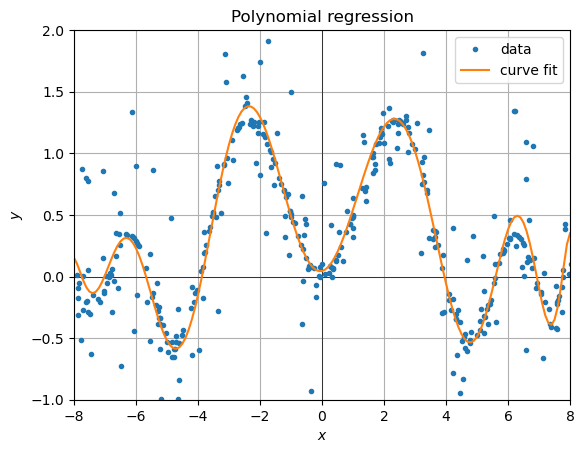

In [4]:
# Example: Fit through n points
n = 400
xdata = np.linspace(-8.0, 8.0, n) + 0.2 * np.random.randn(n)
ydata = 3.0 * np.sin(0.2 * xdata * xdata) / (1.0 + 0.2 * xdata * xdata)
ydata += np.clip(np.random.randn(n) ** 3 / 8.0, -1.0, 1.0)

xs = [i / 10.0 for i in range(-80, 81)]
ys = [polynomial(x, xdata, ydata, 15) for x in xs]

%matplotlib inline
import matplotlib.pyplot as plt
plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.title('Polynomial regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.axis((-8.0, 8.0, -1.0, 2.0)); plt.grid(True); plt.legend(); plt.show()

<div class="alert alert-block alert-info">
    
<b>Note:</b> The following material covers *local* regression methods. This expands on the material in the book.

</div>

### Kernel smoothing

One slight disadvantage of linear regression is that it requires you to specify a model that is able to fit the data reliably. Sometimes, this is hard to achieve. For interpolation we saw that results can improve by working with piecewise functions (splines) instead of polynomials; this allowed us to more faithfully interpolate complicated function with relatively low-degree polynomials. For linear regression something similar can be achieved by weighting the available data such that only those data points that are close to the $x$-value of interest influence the outcome. The resulting techniques are described as [local regression](https://en.wikipedia.org/wiki/Local_regression) methods.

The first method that we discuss uses [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother), which is a variant of [moving averaging](https://en.wikipedia.org/wiki/Moving_average). In order to predict the value of a fitted function $f(x)$, we average the observed data $y_i$, weighting the values that are closest to the requested $x$ more heavily than those that are further away. If the data are densely sampled, this allows us to average away most of the noise in the signal, while retaining most of the systematic signal variations. This property it shares with regression. However, in this approach no explicit model functions need to be specified.

The formula for a kernel smoother is

$$
f(x) = \frac{\sum_i k(x, x_i) \cdot y_i}{\sum_i k(x, x_i)}
$$

Here, the kernel function $k(x, x_i)$ defines the weights that are attributed to the data points. The kernel is typically defined by its width $h$ and its shape $w(x)$, and can be written as follows

$$
k(x, x_i) = w \left( \frac{x - x_i}{h} \right)
$$

The width of the [apodization window](https://en.wikipedia.org/wiki/Window_function) function $w(x)$ should be chosen such that the window comprises multiple data points that can be averaged, while at the same time it should be taken narrow enough in order to be able to follow the variations in the signal. Several choices are common for the shape of the window. For example:

* a rectangular window;

* a gaussian window;

* a triangular window;

* an exponential window;

* a parabolic (Welch) window;

* a tri-cubic window.

Many more examples can be found online; look up their definitions (for example [here](https://en.wikipedia.org/wiki/Window_function) and [here](https://en.wikipedia.org/wiki/Kernel_(statistics))).

**Exercise 2**

Complete the below function `kernel()` that fits a curve through data points that are specified in lists `xdata` and `ydata`, and calculates the $y$-value that correspond with the $x$-value in a variable `x` using kernel smoothing. Besides the provided gaussian window function, implement the rectangular and tricubic windows and at least one other window function of your own choice.

In [42]:
import numpy as np
rectangular = ...
# gaussian = np.exp(-0.5 * )
#tricubic = ...
def gaussian(x):
    w = np.exp(-0.5 * x * x)
    return w

def tricubic(x):
    w = (1.0 - (np.abs(x))**3)**3
    w = np.maximum(w, 0.0)
    w[w < 0.0] = 0.0
    return w

def rect(x):
    w = np.zeros([len(x)], float)

    for i, xi in enumerate(x):
        if (abs(xi) <= 1):
            w[i] = 0.5
    w[w < 0.0] = 0.0
    return w

def triangular(x):
    w = np.zeros([len(x)], float)

    for i, xi in enumerate(x):
        if(abs(xi) <= 1):
            w[i] = 1 - abs(xi)
    w[w < 0.0] = 0.0
    return w

def epanechnikov(x):
    w = np.zeros([len(x)], float)

    for i, xi in enumerate(x):
        if(abs(xi) <= 1):
            w[i] = 0.75 * (1 - xi**2)
    w[w < 0.0] = 0.0
    return w

def quartic(x):
    w = np.zeros([len(x)], float)

    for i, xi in enumerate(x):
        if(abs(xi) <= 1):
            w[i] = (15. / 16.) * (1 - xi**2)**2
    w[w < 0.0] = 0.0
    return w

def kernel(x, xdata, ydata, width=1.0, window=gaussian):
    """y = kernel(x, xdata, ydata, width=1.0, window=gaussian).
    Kernel smoothing method that fits a curve through
    data {xdata,ydata}, using a given window function
    with a specified width, evaluated at x.
    x      = argument x
    xdata  = {x0,x1,...,xn}
    ydata  = {y0,y1,...,yn}
    window = window function (default: gaussian)
    width  = window width (default: 1.0)
    """
    xdata = np.array(xdata)
    ydata = np.array(ydata)
    wdata = window((x - xdata) / width)
    y = np.sum(wdata * ydata) / np.sum(wdata)

    return y

We again apply the method to a series of $n$ points that follow an oscillatory curve. Try varying the window width and shape to get the best fit that you can.

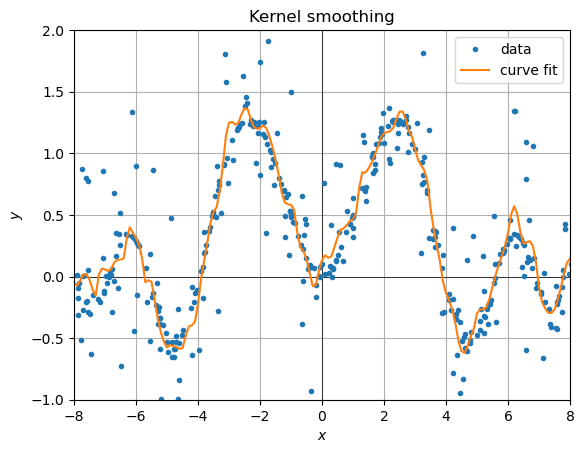

In [41]:
# Example: Fit through n points
ys = [kernel(x, xdata, ydata, width=0.3, window=quartic) for x in xs]

plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.title('Kernel smoothing'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.axis((-8.0, 8.0, -1.0, 2.0)); plt.grid(True); plt.legend(); plt.show()

### LOESS / LOWESS regression

The previous kernel smoothing method is less than ideal for various reasons. Improvements can be made as follows.

* First, if the density of data points various across the region where measurements are available, the use of a kernel with constant width may be ill advised. For instance, when using one of the windows for which $w(x) = 0$ for sufficiently large $x$ (like the rectangular or parabolic windows), no points may fall inside a window when there is a big gap between the data points. This may of course be solved by using a window function with infinite tails (like a gaussian or exponential window). A better solution would be to choose the width adaptively such that always a fixed fraction of data points fall within the interval from $x-h$ to $x+h$. Thus, in regions with sparse points, the width is chosen bigger than in regions with dense points. That is, choose $h$ such that a fraction $\alpha$ of all data points have a distance $|x-x_i| \leq h$. The result is sometimes called a *nearest neighbor smoother*.

* Second, instead of simply calculating the weighted average of all $y_i$, which is essentially the same as fitting a 0<sup>th</sup>-degree constant polynomial through the weighted data, one could fit a higher-degree polynomial through the data. Still, for each $x$, the data $(x_i, y_i)$ are weighted differently in the regression model according to their distance from $x$. Typically, a 1<sup>st</sup>-degree linear polynomial polynomial is used, in which case a method is obtained that is refered to as *locally estimated scatterplot smoothing* (*LOESS*). Sometimes, a 2<sup>nd</sup>-degree quadratic polynomial is employed, leading to a method called *locally weighted scatterplot smoothing* (*LOWESS*). Higher degrees rarely occur because the idea behind the method is that the curving shape of the function can be followed by using a sufficiently narrow window, rather than a sufficiently complicated polynomial.

Weighting can be introduced in linear regression by using weighted sums like $\sum_i w_i \cdot x_i^m$ in the calculation of the matrix $\boldsymbol{M}$, and similarly the vector $\boldsymbol{b}$.

**Exercise 3**

Write a function `loess()` that fits a polynomial of given `degree` through data points that are specified in lists `xdata` and `ydata`, weighted according to a windowing function with an adaptively chosen width such that a fraction $\alpha$ contributes to the fit, and that calculates the $y$-value that correspond with the $x$-value in a variable `x` using polynomial regression.

In [6]:
import numpy as np
mydata = np.array([1,2,3,4,5,6,7,8,9,10])
np.percentile(mydata,50)

5.5

In [44]:
def loess(x, xdata, ydata, degree=1, alpha=0.5, window=tricubic):
    """y = loess(x, xdata, ydata, degree=1, alpha=0.5, window=tricubic).
    LOESS smoothing method that fits a curve through data
    {xdata,ydata}, based on polynomial regression of a
    specified degree, using a given window function that
    comprises a given fraction alpha of data, evaluated at x.
    x      = argument x
    xdata  = {x0,x1,...,xn}
    ydata  = {y0,y1,...,yn}
    degree = polynomial degree (default: 1)
    alpha  = fraction (default: 0.5)
    window = window function (default: gaussian)
    """
    distances = np.abs(xdata - x)
    width = np.quantile(distances, alpha) 
    xdata = np.array(xdata)
    ydata = np.array(ydata)
    wdata = window((x - xdata) / width)
    matrix = np.empty((degree+1, degree+1))
    vector = np.empty(degree+1)
    momentsx = []
    momentsxy = []

    powerx = wdata
    powerxy = wdata * ydata

    for power in range(2 * degree + 1):
        momentsx.append(np.sum(powerx))
        powerx *= xdata
        momentsxy.append(np.sum(powerxy))
        powerxy *= xdata

    for raw in range(degree +1):
        for column in range(degree+1):
            matrix[raw, column] = momentsx[raw + column]
        vector[raw] = momentsxy[raw]

    coefs = linalg.solve(matrix, vector)
    powerx = 1
    y = 0

    for power in range(degree + 1):
        y += coefs[power] * powerx
        powerx *= x
    
    return y

We again apply the method to a series of $n$ points that follow an oscillatory curve. Vary the function parameters to get the best fit that you can.

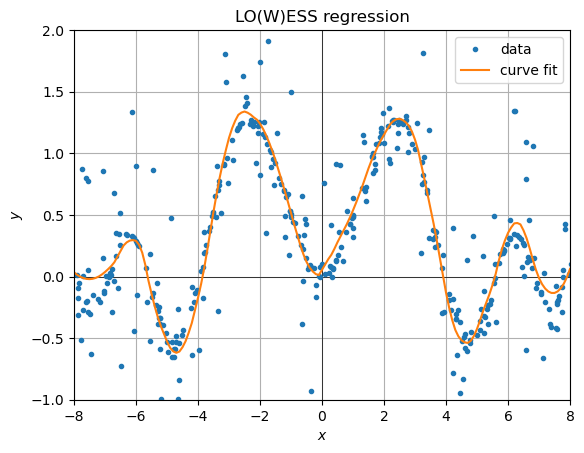

In [48]:
# Example: Fit through n points
ys = [loess(x, xdata, ydata, degree=2, alpha=0.15, window=tricubic) for x in xs]

plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.title('LO(W)ESS regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.axis((-8.0, 8.0, -1.0, 2.0)); plt.grid(True); plt.legend(); plt.show()

### Exercises

**Exercise 4**

Compare the results of your own polynomial fitting function to that from the `polyfit()` & `polyval()` functions in [numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). Fit and plot the previous test data using a polynomial of degree 16. Do the results agree?

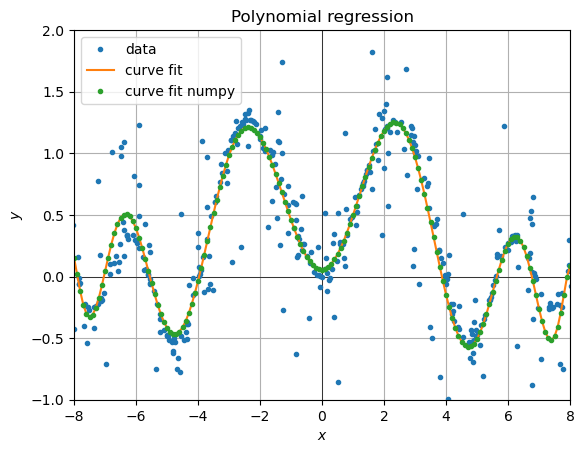

In [55]:
# Example: Fit through n points

n = 400
xdata = np.linspace(-8.0, 8.0, n) + 0.2 * np.random.randn(n)
ydata = 3.0 * np.sin(0.2 * xdata * xdata) / (1.0 + 0.2 * xdata * xdata)
ydata += np.clip(np.random.randn(n) ** 3 / 8.0, -1.0, 1.0)

xs = [i / 10.0 for i in range(-80, 81)]
ys = [polynomial(x, xdata, ydata, 16) for x in xs]

# this is a list of coefficients that we can use it in other 
# internal functions such as poly1d or poly val for poly1d we should write p(xs)
# when we want to sketch it
ys1 = np.polyfit(xdata, ydata, 16)
#p = np.poly1d(ys1)
p = np.polyval(ys1, xs)

%matplotlib inline
import matplotlib.pyplot as plt
plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.plot(xs, p, '.', label='curve fit numpy')
plt.title('Polynomial regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.axis((-8.0, 8.0, -1.0, 2.0)); plt.grid(True); plt.legend(); plt.show()

**Exercise 5**

Generate your own artificial data with equidistantly spaced data points with $-1 \leq x_i \leq +1$, and corresponding $y_i = -1$ if $x_i < 0$ or $y_i = +1$ if $x_i > 0$. That is, the data follow a step function. Fit the data with a polynomial curve fit, with kernel smoothing, as well as a LO(W)ESS fit. Choose any parameters reasonably. Which method(s) follow(s) the data most faithfully?

C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_23732\3759867022.py:65: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sum(wdata * ydata) / np.sum(wdata)


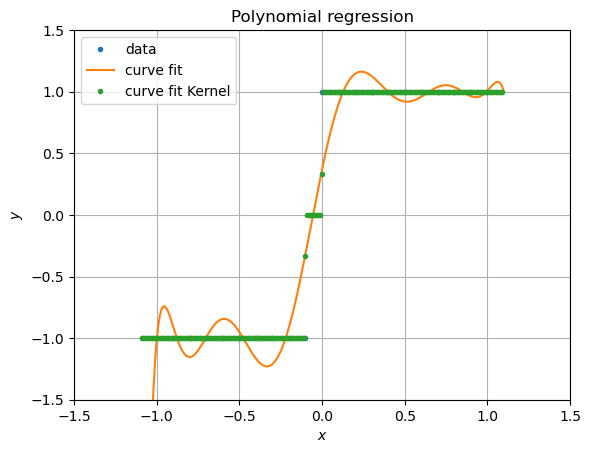

In [81]:
xdata = np.array([i / 10.0 for i in range(-10, 11)])
ydata = np.zeros(len(xdata))
for i,xi in enumerate(xdata):
    if xi < 0:
        ydata[i] = -1.0
    else:
        ydata[i] = 1.0

xs = [i / 100.0 for i in range(-110, 111)]
ys = [polynomial(x, xdata, ydata, 10) for x in xs]
ys1 = [kernel(x, xdata, ydata, width=0.1, window=rect) for x in xs]

import matplotlib.pyplot as plt
#plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.plot(xs, ys1, '.', label='curve fit Kernel')
plt.title('Polynomial regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.axis((-1.5, 1.5, -1.5, 1.5)); plt.grid(True); plt.legend(); 
plt.show()

**Exercise 6**

The [phon scale](https://en.wikipedia.org/wiki/Phon) is a scale that quantifies the subjective loudness of sounds. The below code fragment loads the [equal loudness contours](https://en.wikipedia.org/wiki/Equal-loudness_contour) of human hearing (from: [Lawrence Yule](https://chart-studio.plotly.com/~mrlyule)).

```python
import pandas as pd
url = 'https://chart-studio.plotly.com/~mrlyule/16.csv'
loudness = pd.read_csv(url, skiprows=1, index_col=0)
loudness = loudness.iloc[:-1].drop(columns='10')
```

For sound frequencies from 20 Hz to 16 kHz, the sound level (in decibel Sound Pressure Level, dB SPL) that is required to evoke a perceptual loudness of 0 to 100 phons in steps of 20 phons is listed.
 
Plot all of these data series together with their quadratic curve fits. Use a logarithmic frequency axis, both for modelling and plotting these data.

In [88]:
import pandas as pd
url = 'https://chart-studio.plotly.com/~mrlyule/16.csv'
loudness = pd.read_csv(url, skiprows=1)#, index_col=0)
loudness = loudness.iloc[:-1].drop(columns='10')
loudness.head()

,frequency,0,20,40,60,80,100
0,20.0,76.55,89.58,99.85,109.51,118.99,128.41
1,25.0,65.62,82.65,93.94,104.23,114.23,124.15
2,31.5,55.12,75.98,88.17,99.08,109.65,120.11
3,40.0,45.53,69.62,82.63,94.18,105.34,116.38
4,50.0,37.63,64.02,77.78,89.96,101.72,113.35


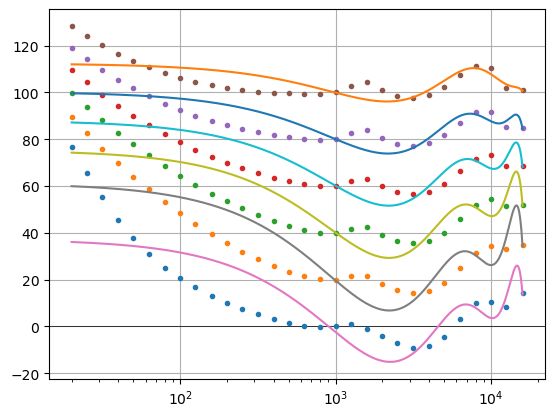

array([ 7.655e+01,  6.562e+01,  5.512e+01,  4.553e+01,  3.763e+01,
        3.086e+01,  2.502e+01,  2.051e+01,  1.665e+01,  1.312e+01,
        1.009e+01,  7.540e+00,  5.110e+00,  3.060e+00,  1.480e+00,
        3.000e-01, -3.000e-01, -1.000e-02,  1.030e+00, -1.190e+00,
       -4.110e+00, -7.050e+00, -9.030e+00, -8.490e+00, -4.480e+00,
        3.280e+00,  9.830e+00,  1.048e+01,  8.380e+00,  1.410e+01])

In [104]:
xdata = np.array(loudness['frequency'])
ydata = np.array(loudness['0'])
ydata1 = np.array(loudness['20'])
ydata2 = np.array(loudness['40'])
ydata3 = np.array(loudness['60'])
ydata4 = np.array(loudness['80'])
ydata5 = np.array(loudness['100'])

xs = [i for i in range(20, 16000)]
ys = [polynomial(x, xdata, ydata, 5) for x in xs]
ys1 = [polynomial(x, xdata, ydata1, 5) for x in xs]
ys2 = [polynomial(x, xdata, ydata2, 5) for x in xs]
ys3 = [polynomial(x, xdata, ydata3, 5) for x in xs]
ys4 = [polynomial(x, xdata, ydata4, 5) for x in xs]
ys5 = [polynomial(x, xdata, ydata5, 5) for x in xs]
#ys1 = [kernel(x, xdata, ydata, width=0.1, window=rect) for x in xs]

import matplotlib.pyplot as plt
plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, ydata1, '.', label='data')
plt.plot(xdata, ydata2, '.', label='data')
plt.plot(xdata, ydata3, '.', label='data')
plt.plot(xdata, ydata4, '.', label='data')
plt.plot(xdata, ydata5, '.', label='data')
plt.plot(xs, ys, '-', label='curve fit')
plt.plot(xs, ys1, '-', label='curve fit')
plt.plot(xs, ys2, '-', label='curve fit')
plt.plot(xs, ys3, '-', label='curve fit')
plt.plot(xs, ys4, '-', label='curve fit')
plt.plot(xs, ys5, '-', label='curve fit')
#plt.plot(xs, ys1, '.', label='curve fit Kernel')
#plt.title('Polynomial regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.xscale('log'); 
plt.grid(True); #plt.legend(); 
plt.show()
ydata

**Exercise 7**

Given the following data regarding the population size of the Netherlands (from: [Wikipedia](https://en.wikipedia.org/wiki/Demography_of_the_Netherlands#/Births_and_deaths)), plot the Dutch population size together with polynomial curve fits of degree 0 to 3 from the year 1900 until 2050.

What are these models' predictions for the population size in 2050?

| Year | Size       |   | Year | Size       |   | Year | Size       |
| ---- | ---------- | - | ---- | ---------- | - | ---- | ---------- |
| 1900 |  5,104,000 |   | 1950 | 10,026,773 |   | 2000 | 15,863,950 |
| 1910 |  5,858,000 |   | 1960 | 11,417,254 |   | 2010 | 16,574,989 |
| 1920 |  6,754,000 |   | 1970 | 12,957,621 |   | 2020 | 17,424,978 |
| 1930 |  7,825,000 |   | 1980 | 14,091,014 |   |      |            |
| 1940 |  8,834,000 |   | 1990 | 14,892,574 |   |      |            |

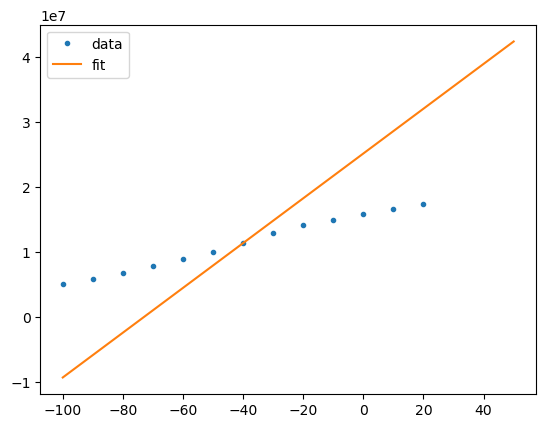

In [29]:
year = list(range(-100, 30, 10))
size = [5104000, 5858000, 6754000, 7825000, 8834000, 10026773, 11417254, 12957621, 14091014, 14892574, 15863950 , 16574989 , 17424978 ]

xs = list(range(-100, 51))
ys = [polynomial(x, year, size, 1) for x in xs]

plt.plot(year, size, '.', label='data')
plt.plot(xs, ys, '-', label='fit')
plt.legend()
plt.show()


**Exercise 8**

Using the following code fragment, some data regarding the [global average temperature](https://en.wikipedia.org/wiki/Global_temperature_record) can be obtained.

```python
import pandas as pd
url = 'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/12/1880-2021.csv'
climate = pd.read_csv(url, skiprows=4, index_col=0)
```

Plot the temperature across the available years, and include a trendline using one of the techniques discussed in this lesson. Choose the method and its parameters such that you get a curve that fits the data well.

***